# 1. IMPORT MODULES AND DEFINE VARIABLES

In [114]:
import inference
import clustering
import importlib
import loadSaveData
importlib.reload(inference)
importlib.reload(clustering)
importlib.reload(loadSaveData)
pathTrain= '../Datasets/Suicide_Detection_train10000(test2000).csv'
pathTest='../Datasets/Suicide_Detection_test2000(train10000).csv'

# 2. LOAD TRAIN AND CREATE OR LOAD TEST EMBEDDINGS

In [2]:
train=loadSaveData.loadEmbeddings(length=10000,dimension=768,type='bert')

Cargando embeddings...
Embeddings cargados


In [3]:
test=inference.create_test_embeddings()

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generando embeddings: 100%|██████████| 2004/2004 [09:46<00:00,  3.42it/s]


Each embedding has: 768 dimensions
Embedding list length (before save): 2004
Guardando embeddings...
aaaaaaa 2004
Cargando embeddings...
Embeddings cargados
Embedding list length (after save) 2004


In [106]:
test= loadSaveData.loadEmbeddings(length=2004,dimension=768,type='bert')

Cargando embeddings...
Embeddings cargados


# 3. CLUSTERING

## 3.1. DBSCAN ORIGINAL

In [107]:
clusters=loadSaveData.loadClusters('DBScan8Clusters')
print(clusters)

[ 0 -1 -1 ... -1 -1  0]


BUSCAR INDICES DE INSTANCIAS TRAIN DEL CLUSTER X

In [115]:
instancias_clusterX_train=inference.buscar_instancias_cluster(clusters,4)
print(instancias_clusterX_train)

[908, 1538, 2235, 3106, 3476, 6173, 6473, 8141]


IMPRIMIR INSTANCIA TRAIN

In [116]:
instancia_test=inference.imprimir_instancia(pathTrain,908)
print(instancia_test)

I can't go onI've been thinking about it for awhile. The pain is just too much now. I spend every night crying myself to sleep. I've made decisions that affect my life drastically that I regret, but I can't go back on. I am not strong enough to continue on. 


AÑADIR AL TEST LAS INSTANCIAS TRAIN QUE NOS INTERESAN

In [117]:
# 2 del cluster 4 (suicide), 2 instancias del cluster 3 (links)
instances_to_add=[908,1538,1894, 2202]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

2008


ASIGNAR CLUSTERS AL TEST

In [118]:
clusters_test=inference.asignar_cluster_test(train,test,clusters)
print(clusters_test)

[0, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, 0, -1, -1, 6, -1, 0, 0, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, 0, -1, 7, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, -1, 0, 0, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, -1, -1, 0, 0, -1, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, -1, -1, -1, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, -1, -1, -1, 

BUSCAR INDICES DE INSTANCIAS TEST DEL CLUSTER X

In [133]:
instancias_clusterX_test=inference.buscar_instancias_cluster(clusters_test,4)
print(instancias_clusterX_test)

[1253, 2004, 2005]


CALCULAR DISTANCIAS INSTANCIA X

In [138]:
inference.distancias_instancia_i(train,test,pathTrain,pathTest,2003)

TEXTO INSTANCIA TEST:  ajahsdkdk akdjjddjkdk kadsjhdyrwuronu
DISTANCIAS [0.1201542  0.09969419 0.10821843 ... 0.10347819 0.09958231 0.1415909 ]
INSTANCIA TRAIN MAS CERCANA: 927 , DISTANCIA: 0.026137471
TEXTO INSTANCIA TRAIN: Text post weekend, what are ur opinions on it? Jdidajhskaidkccjhwshwhaksfoxhawhwjdjdjdjajajaakaksksksksksskskakakeiejccjsiwowoeoifcucucjcdj.


REDUCIR DIMENSIONES - 2D

In [139]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (2008, 768)
Dim test after PCA:  (2008, 2)


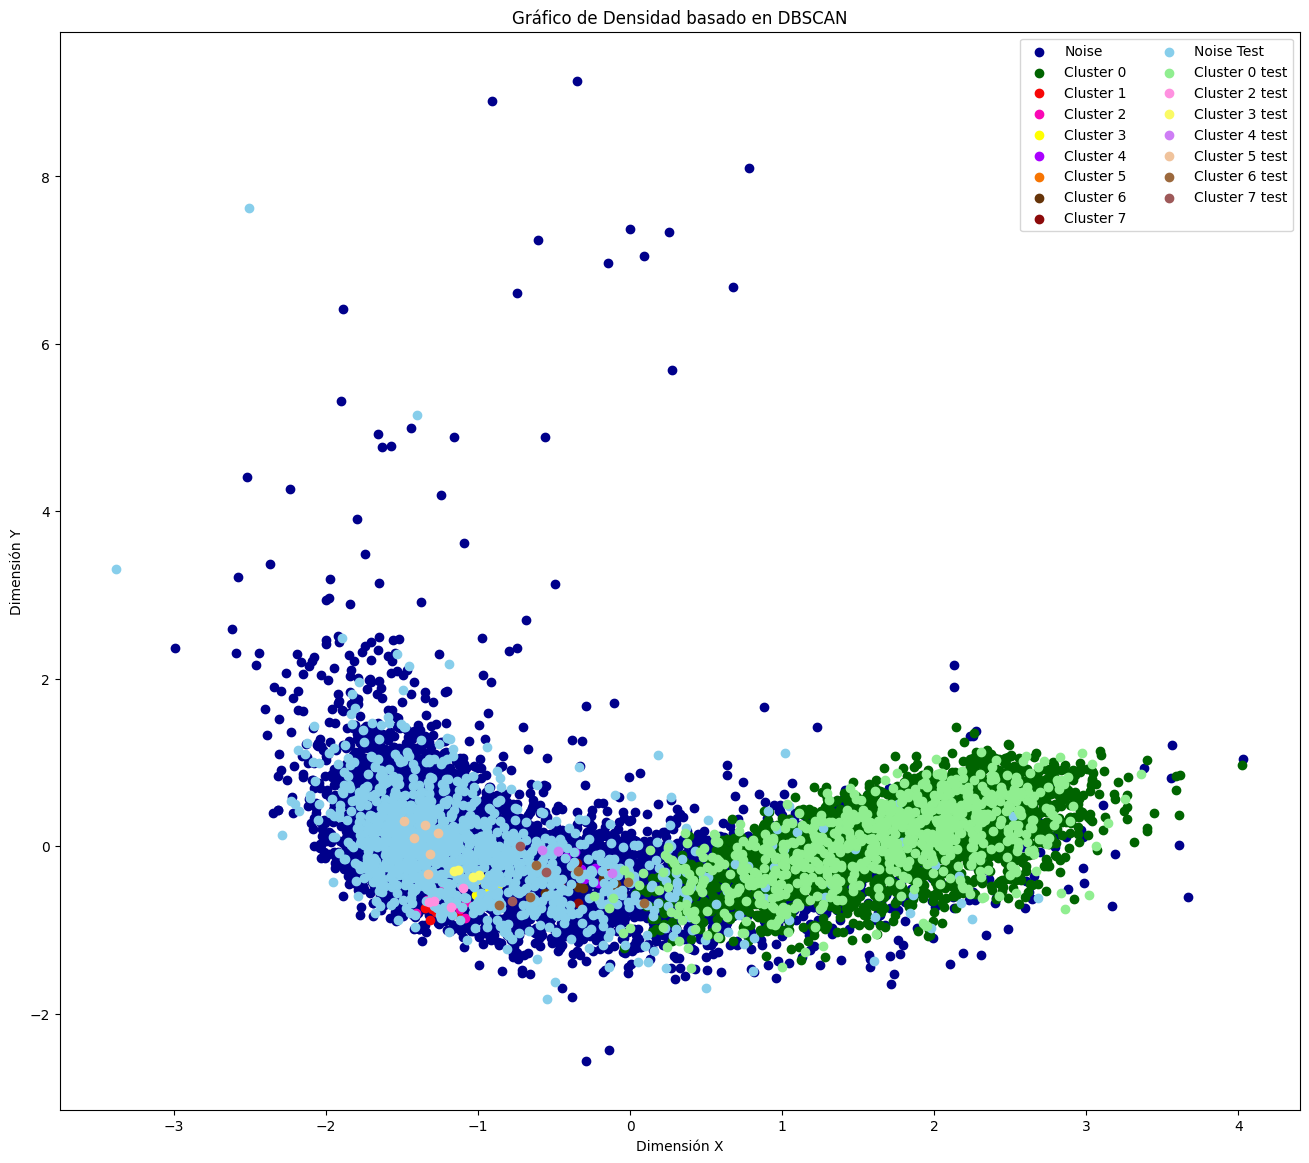

In [140]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test)

REDUCIR DIMENSIONES - 3D

In [141]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (2008, 768)
Dim test after PCA:  (2008, 3)


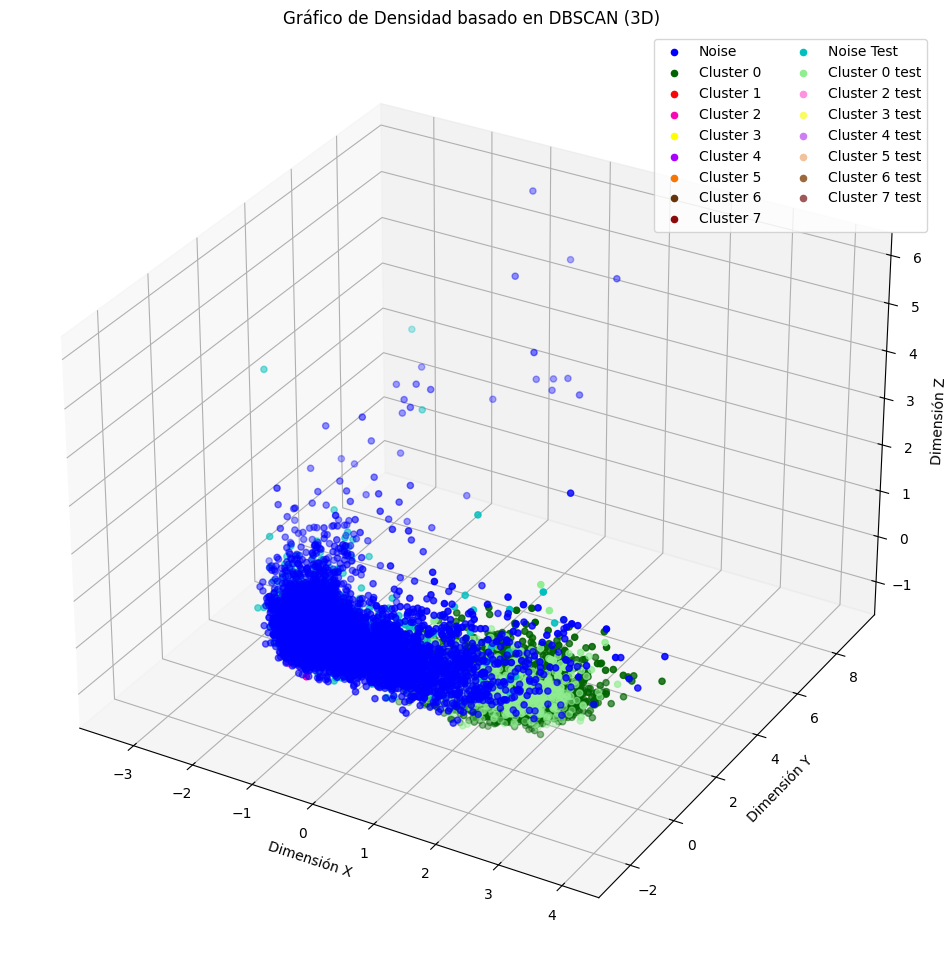

In [142]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test)

## 3.2. DBSCAN IMPLEMENTADO

In [19]:
clusters=loadSaveData.loadClusters('Urruela12Clusters')
print(clusters)

[0 1 1 ... 1 1 0]


BUSCAR INDICES DE INSTANCIAS TRAIN DEL CLUSTER X

In [68]:
instancias_clusterX_train=inference.buscar_instancias_cluster(clusters,2)
print(instancias_clusterX_train)

[38, 360, 397, 407, 451, 761, 1002, 1023, 1202, 1257, 1345, 1467, 1492, 1811, 1823, 1853, 2097, 2141, 2407, 2411, 2612, 2675, 2845, 3101, 3778, 3917, 3971, 4511, 4556, 4852, 5023, 5059, 5417, 5506, 5510, 5970, 6273, 6498, 6502, 6508, 6594, 6623, 6980, 7010, 7168, 7201, 7406, 7649, 7708, 7825, 7915, 8062, 8411, 8548, 8892, 8954, 8977, 9195, 9291, 9294, 9464, 9851, 9859, 9988]


IMPRIMIR INSTANCIA TRAIN

In [69]:
instancia_test=inference.imprimir_instancia(pathTrain,397)
print(instancia_test)

My wife wants a divorce.. 

My wife and I are splitting up. Its because of years of me choosing weed over my family like my sons birthday, my anniversary, all of it... It's all my fault. The women that I spent 5 years of my life married too, had a wonderful unbelievably amazing daughter and son with.. Idk how to do this.

All I want is to kill myself. I don't want to think about.. splitting up material bullshit.. or .. fuck man.. or even how we're suppose to talk to each other now. I'm madly in love with this woman but.. somehow it wasn't enough to overcome my own selfishness. I've ruined the only thing I've ever wanted, a real family. I don't know where I'm suppose to go.. how do I drive now that I'm leaving her with the car, the bills, the kids, my heart, fuck... everything is with this woman. I couldn't stand to see her happy with someone else, but I do wish her nothing but happiness. I just.. she's been kissing me and I was just told its because I want it. She doesn't even want to 

AÑADIR AL TEST LAS INSTANCIAS TRAIN QUE NOS INTERESAN

In [22]:
# 2 instancias cluster 2 (suicidio) y 2 del cluster 4 (links)
instances_to_add=[360, 397,603, 623]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

2008


ASIGNAR CLUSTERS AL TEST

In [23]:
clusters_test=inference.asignar_cluster_test(train,test,clusters)
print(clusters_test)

[0, 1, 1, 0, 1, 0, 0, 1, 4, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 7, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 1, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 7, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, -1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1

BUSCAR INDICES DE INSTANCIAS TEST DEL CLUSTER X

In [100]:
instancias_clusterX_test=inference.buscar_instancias_cluster(clusters_test,1)
print(instancias_clusterX_test)

[1, 2, 4, 7, 9, 10, 11, 12, 15, 17, 18, 22, 26, 29, 32, 36, 38, 42, 45, 46, 48, 50, 52, 53, 56, 57, 59, 61, 62, 64, 71, 74, 76, 78, 79, 80, 82, 84, 87, 93, 94, 95, 97, 104, 105, 107, 108, 111, 115, 116, 118, 125, 137, 138, 139, 140, 143, 145, 146, 147, 148, 149, 150, 152, 154, 156, 157, 159, 163, 165, 166, 169, 171, 172, 174, 176, 178, 180, 185, 186, 193, 196, 201, 202, 205, 210, 214, 215, 216, 220, 222, 223, 229, 230, 236, 245, 250, 253, 254, 255, 264, 268, 269, 272, 274, 276, 278, 279, 281, 285, 287, 293, 295, 297, 303, 304, 305, 306, 308, 310, 312, 313, 317, 318, 321, 322, 323, 325, 326, 328, 331, 332, 333, 334, 336, 338, 339, 342, 348, 349, 353, 355, 356, 357, 360, 362, 364, 367, 369, 370, 371, 374, 375, 378, 385, 389, 394, 395, 399, 402, 403, 405, 408, 409, 411, 412, 414, 416, 419, 420, 421, 422, 423, 424, 425, 426, 431, 432, 433, 438, 441, 445, 446, 448, 449, 450, 455, 457, 459, 462, 465, 466, 467, 468, 470, 475, 477, 478, 479, 482, 484, 486, 488, 489, 491, 492, 493, 494, 496, 49

DISTANCIAS A INSTANCIA TRAIN MAS CERCANA

In [101]:
inference.distancias_instancia_i(train,test,pathTrain,pathTest,2003)

TEXTO INSTANCIA TEST:  ajahsdkdk akdjjddjkdk kadsjhdyrwuronu
DISTANCIAS [0.1201542  0.09969419 0.10821843 ... 0.10347819 0.09958231 0.1415909 ]
INSTANCIA TRAIN MAS CERCANA: 927 , DISTANCIA: 0.026137471
TEXTO INSTANCIA TRAIN: Text post weekend, what are ur opinions on it? Jdidajhskaidkccjhwshwhaksfoxhawhwjdjdjdjajajaakaksksksksksskskakakeiejccjsiwowoeoifcucucjcdj.


REDUCIR DIMENSIONES - 2D

In [102]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (2008, 768)
Dim test after PCA:  (2008, 2)


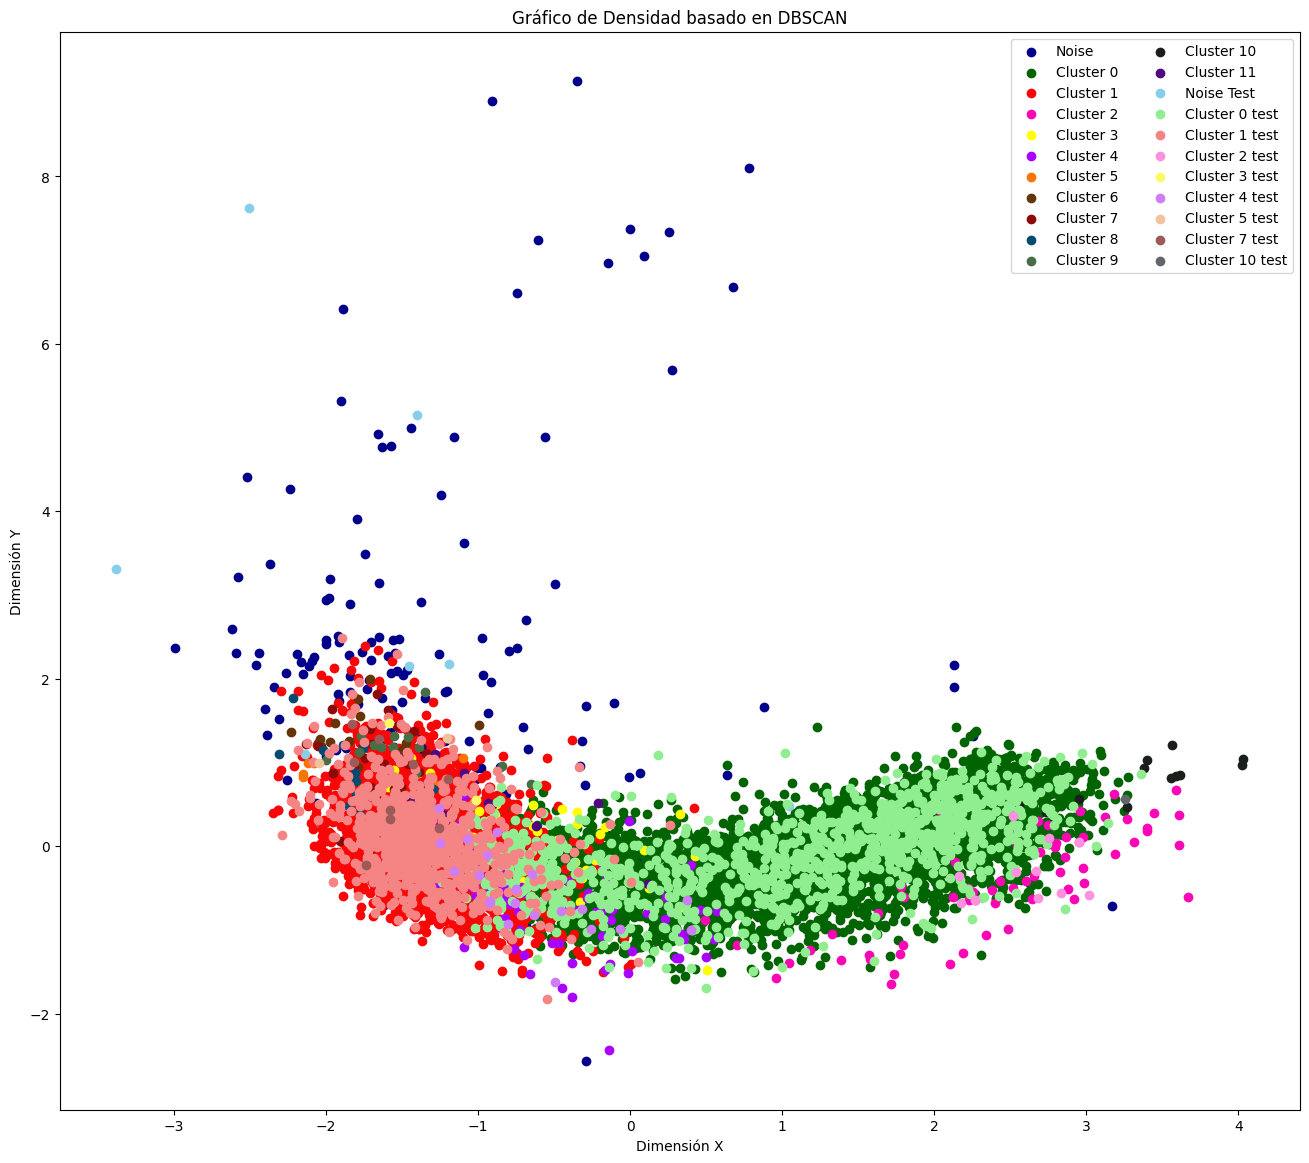

In [103]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test)

REDUCIR DIMENSIONES - 3D

In [104]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (2008, 768)
Dim test after PCA:  (2008, 3)


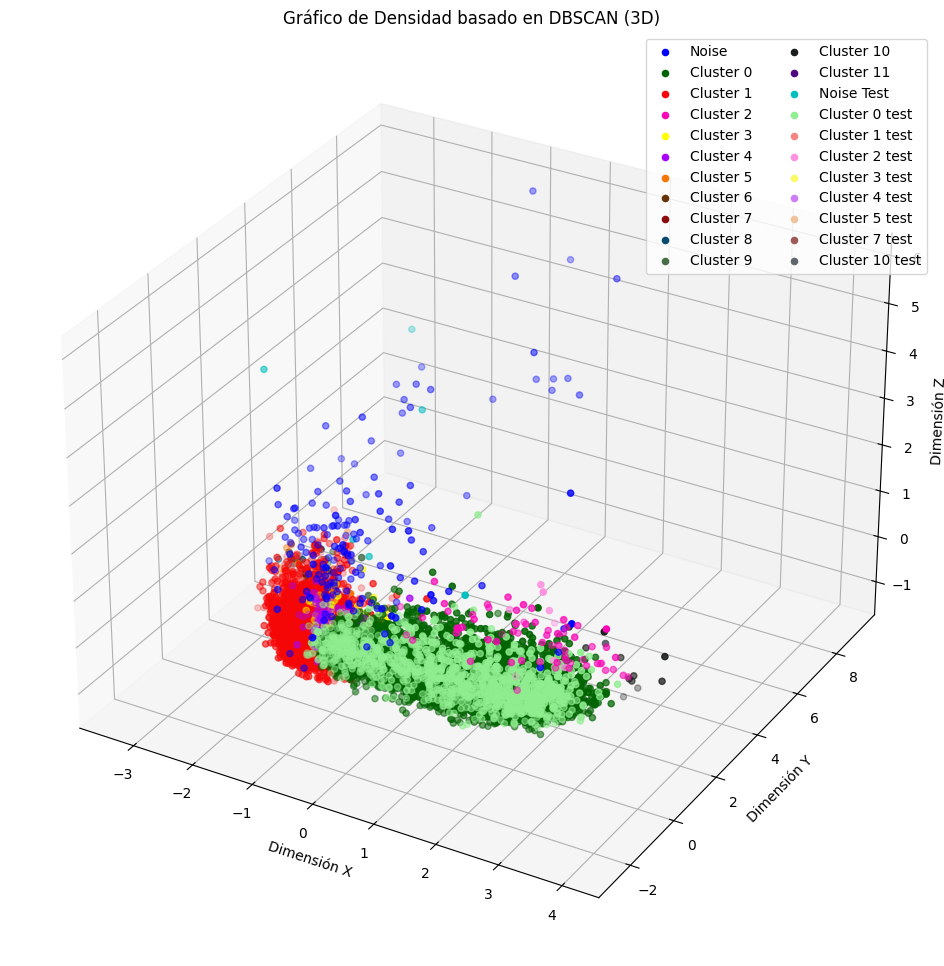

In [105]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test)